✅ First 5 Records of the Dataset:


,Student_ID,Gender,Major,Program,GPA
0,S00001,Male,B.Tech,ECE,7.28
1,S00002,Female,B.Tech,ECE,5.18
2,S00003,Male,B.Tech,CSE,7.98
3,S00004,Male,B.Tech,CHD,5.35
4,S00005,Female,B.Tech,CHD,6.71


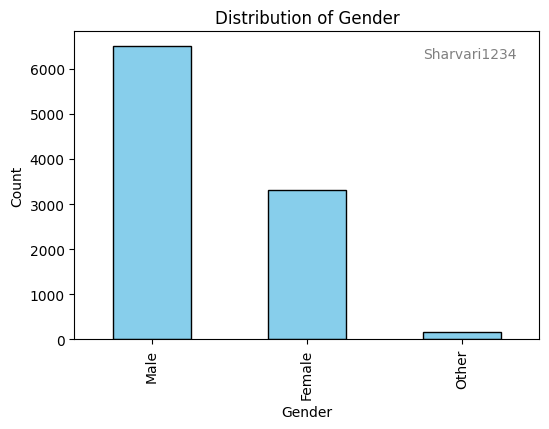

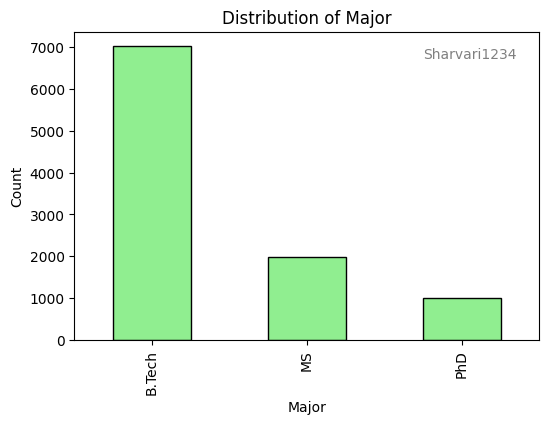

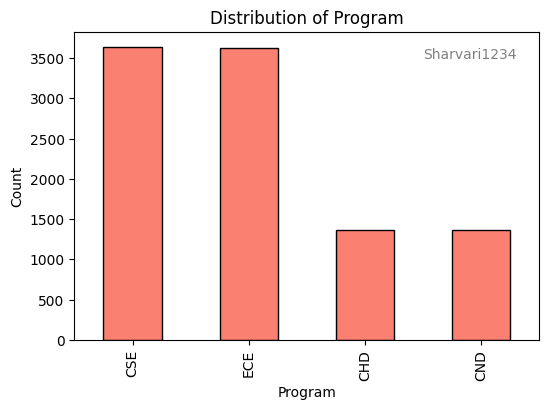

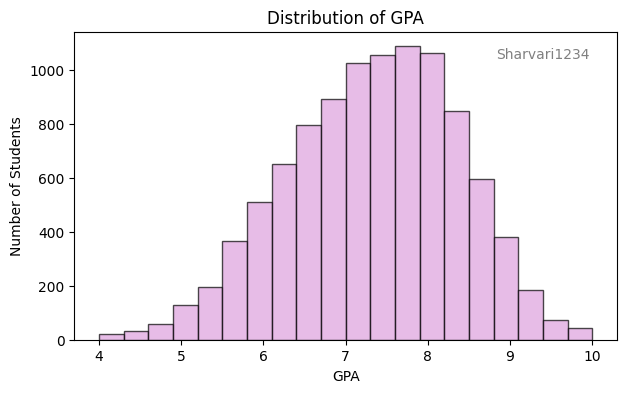

In [1]:
# ==========================================
# Q1.1 — Data Generation and Visualization
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

# Fixed username and seed for reproducibility
username = "Sharvari1234"
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
np.random.seed(seed)

# -----------------------------
# Generate synthetic dataset
# -----------------------------
num_students = 10000

majors = np.random.choice(["B.Tech", "MS", "PhD"], p=[0.7, 0.2, 0.1], size=num_students)
genders = np.random.choice(["Male", "Female", "Other"], p=[0.65, 0.33, 0.02], size=num_students)

programs = []
for m in majors:
    if m == "B.Tech":
        programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=[0.4, 0.4, 0.1, 0.1]))
    elif m == "MS":
        programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=[0.3, 0.3, 0.2, 0.2]))
    else:
        programs.append(np.random.choice(["CSE", "ECE", "CHD", "CND"], p=[0.25, 0.25, 0.25, 0.25]))

# GPA distribution based on major
gpa = []
for m in majors:
    if m == "B.Tech":
        val = np.clip(np.random.normal(7.0, 1.0), 4, 10)
    elif m == "MS":
        val = np.clip(np.random.normal(8.0, 0.7), 4, 10)
    else:
        val = np.clip(np.random.normal(8.3, 0.5), 4, 10)
    gpa.append(round(val, 2))

# Construct DataFrame
df = pd.DataFrame({
    "Student_ID": [f"S{str(i+1).zfill(5)}" for i in range(num_students)],
    "Gender": genders,
    "Major": majors,
    "Program": programs,
    "GPA": gpa
})

# ---------- OUTPUT SECTION ----------
print("✅ First 5 Records of the Dataset:")
display(df.head())

# ---------- VISUALIZATIONS ----------
plt.figure(figsize=(6,4))
df["Gender"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()

plt.figure(figsize=(6,4))
df["Major"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Distribution of Major")
plt.ylabel("Count")
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()

plt.figure(figsize=(6,4))
df["Program"].value_counts().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Distribution of Program")
plt.ylabel("Count")
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(df["GPA"], bins=20, color="plum", edgecolor="black", alpha=0.7)
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()


📊 SUMMARY STATISTICS:
Mean GPA: 7.324
Standard Deviation (Population): 1.035

📋 Count of Students per (Major, Program):


Program,CHD,CND,CSE,ECE
Major,,,,
B.Tech,707,719,2824,2772
MS,391,394,589,602
PhD,269,250,231,252


<Figure size 700x400 with 0 Axes>

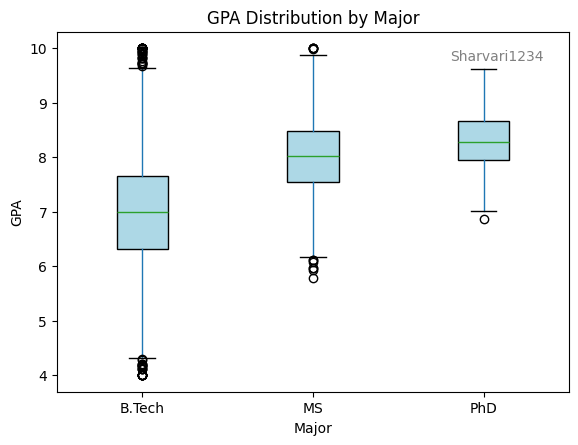

<Figure size 700x400 with 0 Axes>

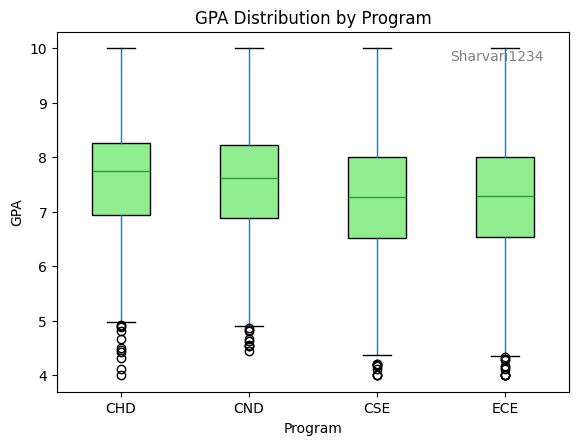

In [2]:
# ==========================================
# Q1.2 — Summary Statistics
# ==========================================

import matplotlib.pyplot as plt

# ---------- NUMERICAL SUMMARY ----------
mean_gpa = df["GPA"].mean()
std_gpa = df["GPA"].std(ddof=0)  # population standard deviation

print("📊 SUMMARY STATISTICS:")
print(f"Mean GPA: {mean_gpa:.3f}")
print(f"Standard Deviation (Population): {std_gpa:.3f}\n")

# ---------- COUNTS PER (MAJOR, PROGRAM) ----------
count_table = df.groupby(["Major", "Program"]).size().unstack(fill_value=0)
print("📋 Count of Students per (Major, Program):")
display(count_table)

# ---------- GPA DISTRIBUTION BY MAJOR ----------
plt.figure(figsize=(7,4))
df.boxplot(column="GPA", by="Major", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue"))
plt.title("GPA Distribution by Major")
plt.suptitle("")
plt.xlabel("Major"); plt.ylabel("GPA")
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()

# ---------- GPA DISTRIBUTION BY PROGRAM ----------
plt.figure(figsize=(7,4))
df.boxplot(column="GPA", by="Program", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightgreen"))
plt.title("GPA Distribution by Program")
plt.suptitle("")
plt.xlabel("Program"); plt.ylabel("GPA")
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()


✅ Gender Balanced Sampling (5 repeats):
  Repeat 1: {'Male': 100, 'Female': 100, 'Other': 100}
  Repeat 2: {'Male': 100, 'Female': 100, 'Other': 100}
  Repeat 3: {'Male': 100, 'Female': 100, 'Other': 100}
  Repeat 4: {'Male': 100, 'Female': 100, 'Other': 100}
  Repeat 5: {'Male': 100, 'Female': 100, 'Other': 100}

⚙️  Random Gender Sampling (5 repeats):
  Repeat 1: {'Male': 173, 'Female': 121, 'Other': 6}
  Repeat 2: {'Male': 188, 'Female': 105, 'Other': 7}
  Repeat 3: {'Male': 193, 'Female': 102, 'Other': 5}
  Repeat 4: {'Male': 196, 'Female': 98, 'Other': 6}
  Repeat 5: {'Male': 191, 'Female': 101, 'Other': 8}


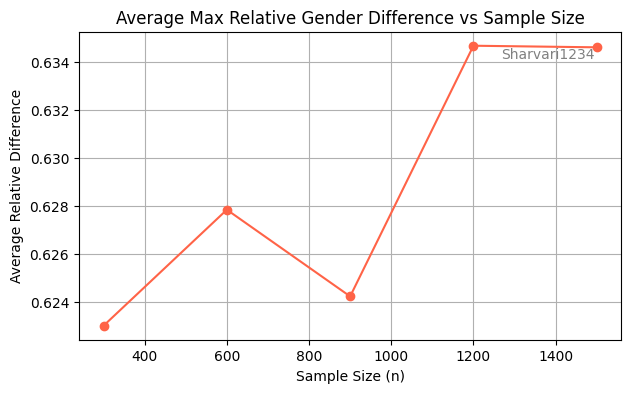

In [3]:
# ==========================================
# Q1.3 — Gender Balanced Sampling
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Function: Exact Gender-Balanced Sampling
# -------------------------------
def gender_balanced_sample(df, n=300, repeats=5, seed=42):
    rng = np.random.default_rng(seed)
    genders = df["Gender"].unique()
    base = n // len(genders)
    remainder = n - base * len(genders)
    results = []

    for i in range(repeats):
        counts = {g: base for g in genders}
        if remainder > 0:
            extras = rng.choice(genders, remainder, replace=False)
            for g in extras:
                counts[g] += 1

        samples = []
        for g in genders:
            subset = df[df["Gender"] == g]
            rep = counts[g] > len(subset)
            samples.append(subset.sample(n=counts[g], replace=rep, random_state=int(rng.integers(0, 1e6))))
        sample_df = pd.concat(samples)
        results.append(sample_df["Gender"].value_counts().to_dict())

    return results

# -------------------------------
# Function: Random Sampling (Strategy A)
# -------------------------------
def gender_random_sample(df, n=300, repeats=5, seed=42):
    rng = np.random.default_rng(seed)
    results = []
    for i in range(repeats):
        sample_df = df.sample(n=n, random_state=int(rng.integers(0, 1e6)))
        results.append(sample_df["Gender"].value_counts().to_dict())
    return results

# -------------------------------
# Function: Plot Avg Max Relative Difference
# -------------------------------
def plot_avg_max_diff(df, sample_sizes, repeats=10, seed=42):
    rng = np.random.default_rng(seed)
    avg_diffs = []

    for n in sample_sizes:
        rel_diffs = []
        for _ in range(repeats):
            sample_df = df.sample(n=n, random_state=int(rng.integers(0, 1e6)))
            counts = sample_df["Gender"].value_counts()
            rel_diff = (counts.max() - counts.min()) / n
            rel_diffs.append(rel_diff)
        avg_diffs.append(np.mean(rel_diffs))

    plt.figure(figsize=(7,4))
    plt.plot(sample_sizes, avg_diffs, marker='o', color='tomato')
    plt.title("Average Max Relative Gender Difference vs Sample Size")
    plt.xlabel("Sample Size (n)")
    plt.ylabel("Average Relative Difference")
    plt.grid(True)
    plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
             ha="right", va="top", color="gray")
    plt.show()

# -------------------------------
# Run the Sampling and Display Outputs
# -------------------------------
balanced = gender_balanced_sample(df, n=300, repeats=5)
random_strategy = gender_random_sample(df, n=300, repeats=5)

print("✅ Gender Balanced Sampling (5 repeats):")
for i, c in enumerate(balanced, 1):
    print(f"  Repeat {i}: {c}")

print("\n⚙️  Random Gender Sampling (5 repeats):")
for i, c in enumerate(random_strategy, 1):
    print(f"  Repeat {i}: {c}")

# Plot average max relative difference
plot_avg_max_diff(df, sample_sizes=[300, 600, 900, 1200, 1500], repeats=10)


✅ GPA Uniform Sampled Dataset (first 5 records):


,Student_ID,Gender,Major,Program,GPA
3365,S03366,Female,B.Tech,ECE,4.37
4232,S04233,Male,B.Tech,ECE,4.00
6034,S06035,Male,B.Tech,CSE,4.00
6934,S06935,Male,B.Tech,CSE,4.19
9340,S09341,Male,B.Tech,ECE,4.59



📊 Sampled 100 students uniformly across GPA bins.



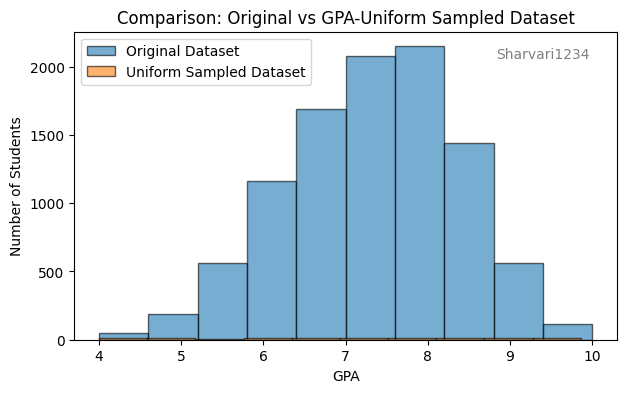

In [4]:
# ==========================================
# Q1.4 — GPA Uniform Sampling
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Function: GPA Uniform Sampling
# -------------------------------
def sample_gpa_uniform(df, n=100, bins=10, seed=42):
    rng = np.random.default_rng(seed)
    edges = np.linspace(df["GPA"].min(), df["GPA"].max(), bins + 1)
    per_bin = n // bins
    remainder = n - per_bin * bins
    sampled_parts = []

    for i in range(bins):
        low, high = edges[i], edges[i + 1]
        subset = df[(df["GPA"] >= low) & (df["GPA"] < high)]
        size = per_bin + (1 if i < remainder else 0)
        replace_flag = size > len(subset)
        sample = subset.sample(n=size, replace=replace_flag, random_state=int(rng.integers(0, 1e6)))
        sampled_parts.append(sample)

    return pd.concat(sampled_parts)

# -------------------------------
# Function: Plot Comparison
# -------------------------------
def plot_gpa_histogram_comparison(df_original, df_sampled, bins=10):
    plt.figure(figsize=(7,4))
    plt.hist(df_original["GPA"], bins=bins, alpha=0.6, label="Original Dataset", edgecolor="black")
    plt.hist(df_sampled["GPA"], bins=bins, alpha=0.6, label="Uniform Sampled Dataset", edgecolor="black")
    plt.xlabel("GPA")
    plt.ylabel("Number of Students")
    plt.title("Comparison: Original vs GPA-Uniform Sampled Dataset")
    plt.legend()
    plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
             ha="right", va="top", color="gray")
    plt.show()

# -------------------------------
# Run GPA Uniform Sampling
# -------------------------------
sampled_df = sample_gpa_uniform(df, n=100, bins=10)

print("✅ GPA Uniform Sampled Dataset (first 5 records):")
display(sampled_df.head())

print(f"\n📊 Sampled {len(sampled_df)} students uniformly across GPA bins.\n")

# Plot histogram comparison
plot_gpa_histogram_comparison(df, sampled_df, bins=10)


✅ Sampled 60 students (Program–Major Balanced)

📋 Count of Sampled Students per (Major, Program):


Program,CHD,CND,CSE,ECE
Major,,,,
B.Tech,5,5,5,5
MS,5,5,5,5
PhD,5,5,5,5


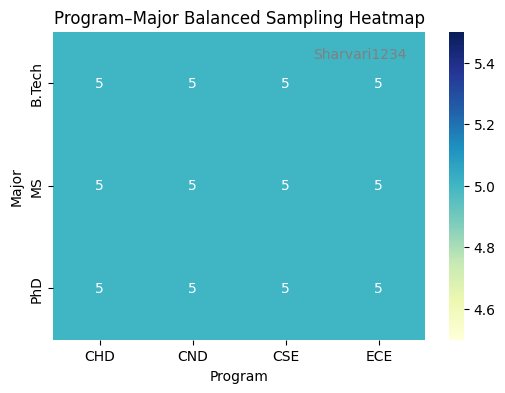

In [5]:
# ==========================================
# Q1.5 — Program–Major Balanced Sampling
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Function: Program–Major Balanced Sampling
# -------------------------------
def sample_program_major_balanced(df, n=60, seed=42):
    rng = np.random.default_rng(seed)
    groups = df.groupby(["Major", "Program"]).size().reset_index(name="count")
    total_combos = len(groups)
    per_group = n // total_combos
    remainder = n - per_group * total_combos

    sampled_parts = []
    for i, row in groups.iterrows():
        subset = df[(df["Major"] == row["Major"]) & (df["Program"] == row["Program"])]
        size = per_group + (1 if i < remainder else 0)
        replace_flag = size > len(subset)
        sample = subset.sample(n=size, replace=replace_flag, random_state=int(rng.integers(0, 1e6)))
        sampled_parts.append(sample)

    return pd.concat(sampled_parts)

# -------------------------------
# Function: Display and Visualize Balance
# -------------------------------
def display_program_major_balance(sampled_df):
    count_table = sampled_df.groupby(["Major", "Program"]).size().unstack(fill_value=0)
    print("📋 Count of Sampled Students per (Major, Program):")
    display(count_table)

    plt.figure(figsize=(6,4))
    sns.heatmap(count_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title("Program–Major Balanced Sampling Heatmap")
    plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
             ha="right", va="top", color="gray")
    plt.show()

# -------------------------------
# Run the Sampling
# -------------------------------
balanced_df = sample_program_major_balanced(df, n=60)
print(f"✅ Sampled {len(balanced_df)} students (Program–Major Balanced)\n")

display_program_major_balance(balanced_df)


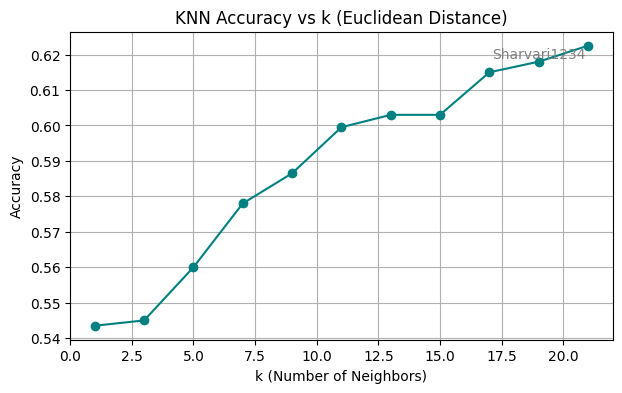

📋 Weighted F1-Scores for Different Distance Metrics:


Distance,cosine,euclidean,manhattan
k,,,
3,0.539,0.531,0.531
5,0.544,0.535,0.535
7,0.528,0.539,0.540
9,0.539,0.534,0.534



📊 F1-Score for Single Features:


,Feature,F1_Score
0,Major,0.543
1,Program,0.558
2,GPA,0.557


In [6]:
# ==========================================
# Q2 — Gender Prediction using KNN
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# -------------------------------
# Step 1: Preprocessing
# -------------------------------
# Convert categorical variables (Major, Program) into numeric via OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[["Major", "Program"]])

# Standardize GPA (since KNN uses distance)
scaler = StandardScaler()
scaled_gpa = scaler.fit_transform(df[["GPA"]])

# Combine all features
X = np.hstack((encoded_features, scaled_gpa))
y = df["Gender"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------------
# Step 2: KNN Model Evaluation for different k values
# -------------------------------
k_values = list(range(1, 22, 2))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot Accuracy vs k
plt.figure(figsize=(7,4))
plt.plot(k_values, accuracy_scores, marker='o', color='teal')
plt.title("KNN Accuracy vs k (Euclidean Distance)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()

# -------------------------------
# Step 3: Evaluate for Different Distance Metrics
# -------------------------------
distance_metrics = ["euclidean", "manhattan", "cosine"]
f1_results = []

for metric in distance_metrics:
    for k in [3, 5, 7, 9]:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_results.append({"Distance": metric, "k": k, "F1_Score": f1})

f1_df = pd.DataFrame(f1_results)
print("📋 Weighted F1-Scores for Different Distance Metrics:")
display(f1_df.pivot(index="k", columns="Distance", values="F1_Score").round(3))

# -------------------------------
# Step 4: Evaluate Single Features
# -------------------------------
single_features = ["Major", "Program", "GPA"]
f1_single = []

for feature in single_features:
    if feature in ["Major", "Program"]:
        X_feat = encoder.fit_transform(df[[feature]])
    else:
        X_feat = scaler.fit_transform(df[[feature]])
    
    X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=42, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_single.append({"Feature": feature, "F1_Score": f1})

single_df = pd.DataFrame(f1_single)
print("\n📊 F1-Score for Single Features:")
display(single_df.round(3))


📋 Model Performance Summary (R² and RMSE):


,Regularization,Alpha,R2,RMSE
0,none,0.001,0.2330,0.8918
1,none,0.010,0.2330,0.8918
2,none,0.100,0.2330,0.8918
3,none,1.000,0.2330,0.8918
4,none,10.000,0.2330,0.8918
5,l1,0.001,0.2332,0.8916
6,l1,0.010,0.2333,0.8916
7,l1,0.100,0.1929,0.9148
8,l1,1.000,-0.0001,1.0183
9,l1,10.000,-0.0001,1.0183


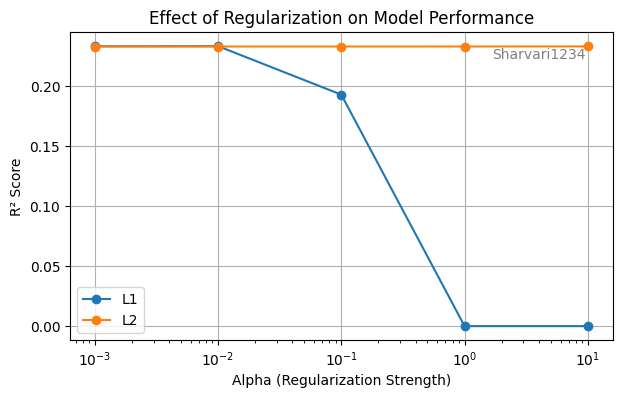

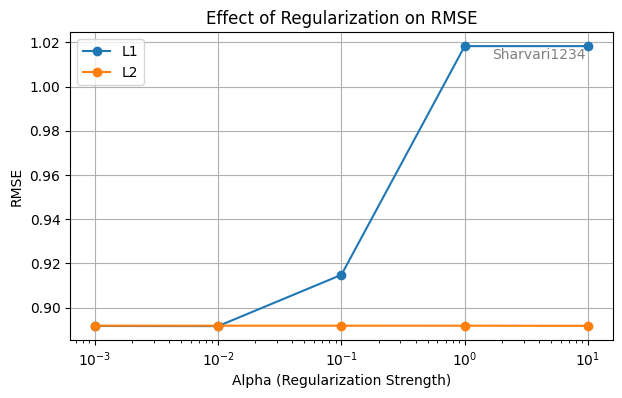

In [7]:
# ==========================================
# Q3 — Linear Regression with Regularization (L1, L2, None)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# -------------------------------
# Step 1: Preprocessing
# -------------------------------
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[["Major", "Program", "Gender"]])

scaler = StandardScaler()
# GPA will be the target variable here
X = encoded_features
y = df["GPA"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 2: Train Models with Different Regularizations
# -------------------------------
alphas = [0.001, 0.01, 0.1, 1, 10]
results = []

for reg_type in ["none", "l1", "l2"]:
    for alpha in alphas:
        if reg_type == "none":
            model = LinearRegression()
        elif reg_type == "l1":
            model = Lasso(alpha=alpha, max_iter=10000)
        elif reg_type == "l2":
            model = Ridge(alpha=alpha)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        results.append({"Regularization": reg_type, "Alpha": alpha, "R2": r2, "RMSE": rmse})

results_df = pd.DataFrame(results)

# -------------------------------
# Step 3: Display Performance Table
# -------------------------------
print("📋 Model Performance Summary (R² and RMSE):")
display(results_df.round(4))

# -------------------------------
# Step 4: Plot R² vs α (L1 & L2)
# -------------------------------
plt.figure(figsize=(7,4))
for reg in ["l1", "l2"]:
    sub = results_df[results_df["Regularization"] == reg]
    plt.plot(sub["Alpha"], sub["R2"], marker='o', label=reg.upper())
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("R² Score")
plt.title("Effect of Regularization on Model Performance")
plt.legend()
plt.grid(True)
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()

# -------------------------------
# Step 5: Plot RMSE vs α (L1 & L2)
# -------------------------------
plt.figure(figsize=(7,4))
for reg in ["l1", "l2"]:
    sub = results_df[results_df["Regularization"] == reg]
    plt.plot(sub["Alpha"], sub["RMSE"], marker='o', label=reg.upper())
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("RMSE")
plt.title("Effect of Regularization on RMSE")
plt.legend()
plt.grid(True)
plt.text(0.95, 0.95, username, transform=plt.gca().transAxes,
         ha="right", va="top", color="gray")
plt.show()
